In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [9]:
import matplotlib.pyplot as plt


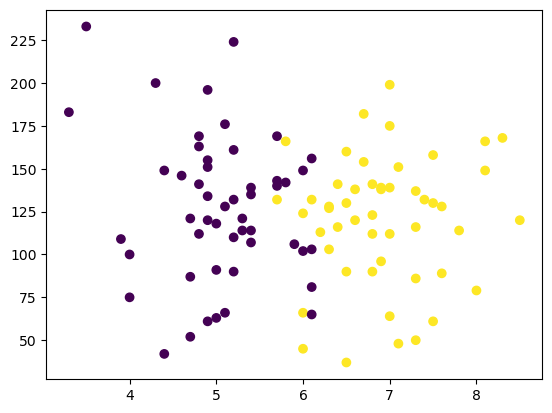

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y.shape

(100,)

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [15]:
X_train

,cgpa,iq
83,7.5,130.0
52,7.0,175.0
96,4.4,42.0
5,7.1,48.0
19,5.2,132.0
...,...,...
85,5.8,166.0
36,5.7,140.0
22,4.9,120.0
0,6.8,123.0


In [16]:
y_train

83    1
52    1
96    0
5     1
19    0
     ..
85    1
36    0
22    0
0     1
4     0
Name: placement, Length: 90, dtype: int64

In [17]:
X_test

,cgpa,iq
13,6.4,116.0
17,3.3,183.0
45,6.0,66.0
87,5.7,132.0
15,5.1,176.0
72,7.3,116.0
8,6.1,156.0
78,6.1,81.0
90,7.3,86.0
2,5.3,121.0


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_train

array([[ 1.3093319 ,  0.15978027],
       [ 0.87126546,  1.28518913],
       [-1.40667999, -2.04101928],
       [ 0.95887875, -1.89096476],
       [-0.7057737 ,  0.20979844],
       [-1.05622685,  0.9850801 ],
       [ 1.3093319 , -1.56584665],
       [-0.7057737 , -0.84058316],
       [ 0.34558574,  0.43488021],
       [ 0.87126546,  0.38486204],
       [-2.19519958,  2.73571611],
       [-0.26770727,  1.13513462],
       [-1.84474643, -0.36541053],
       [-0.53054713,  0.2848257 ],
       [-0.7057737 , -0.34040145],
       [-0.88100027, -1.51582848],
       [ 0.08274588,  0.20979844],
       [ 1.39694519, -0.86559225],
       [ 1.39694519,  0.1097621 ],
       [ 2.18546477, -0.09031059],
       [ 1.83501162,  1.06010736],
       [-1.14384013, -1.79092842],
       [ 1.83501162,  0.6349529 ],
       [-1.49429328,  1.91041627],
       [ 0.78365218,  0.38486204],
       [ 0.43319903, -2.16606471],
       [-1.14384013, -0.91561042],
       [-1.23145342,  0.55992564],
       [-0.96861356,

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[ 0.34558574, -0.19034693],
       [-2.37042615,  1.48526182],
       [-0.0048674 , -1.44080122],
       [-0.26770727,  0.20979844],
       [-0.79338699,  1.31019822],
       [ 1.13410532, -0.19034693],
       [ 0.08274588,  0.8100165 ],
       [ 0.08274588, -1.06566493],
       [ 1.13410532, -0.9406195 ],
       [-0.61816041, -0.0653015 ]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

In [26]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = clf.predict(X_test)

In [28]:
y_test

13    1
17    0
45    1
87    1
15    0
72    1
8     0
78    0
90    1
2     0
Name: placement, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred)

0.7

In [31]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

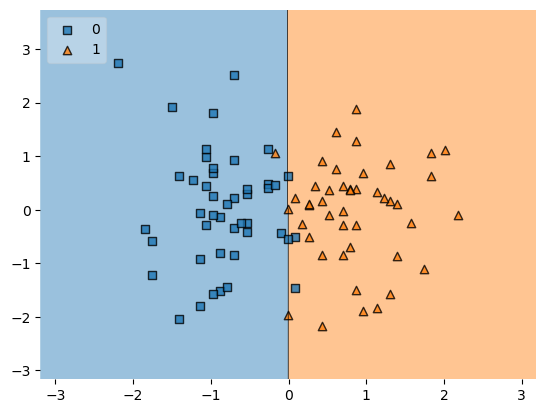

In [32]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [33]:
import pickle

In [34]:
pickle.dump(clf,open('model.pkl','wb'))